In [6]:
from diffusers import StableDiffusionPipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    torch_dtype=torch.float16,
    revision="fp16"
).to(device) 
prompt = "A futuristic city skyline at sunset, digital art"

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/shaunak/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/shaunak/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/shaunak/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/shaunak/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [7]:
# pipe.safety_checker = lambda images, **kwargs: (images, False)
result = pipe(prompt, output_type="pt")
image_tensor = result.images
print("Image tensor range : (", image_tensor.max(), image_tensor.min())
image_tensor = (image_tensor.clamp(-1, 1) + 1) / 2  # Rescale from [-1, 1] to [0, 1]

print("Image tensor shape:", image_tensor.shape)
print("Tensor preview:", image_tensor[0, :, :4, :4])  # print top-left patch for sanity

  0%|          | 0/50 [00:00<?, ?it/s]

Image tensor range : ( tensor(1., device='cuda:0', dtype=torch.float16) tensor(0.0105, device='cuda:0', dtype=torch.float16)
Image tensor shape: torch.Size([1, 3, 512, 512])
Tensor preview: tensor([[[0.6592, 0.6523, 0.6543, 0.6533],
         [0.6543, 0.6572, 0.6562, 0.6553],
         [0.6543, 0.6553, 0.6562, 0.6572],
         [0.6543, 0.6553, 0.6562, 0.6562]],

        [[0.6543, 0.6455, 0.6455, 0.6484],
         [0.6489, 0.6484, 0.6470, 0.6465],
         [0.6465, 0.6465, 0.6484, 0.6499],
         [0.6475, 0.6494, 0.6484, 0.6494]],

        [[0.6768, 0.6812, 0.6831, 0.6870],
         [0.6851, 0.6865, 0.6875, 0.6860],
         [0.6846, 0.6875, 0.6904, 0.6885],
         [0.6855, 0.6865, 0.6895, 0.6875]]], device='cuda:0',
       dtype=torch.float16)


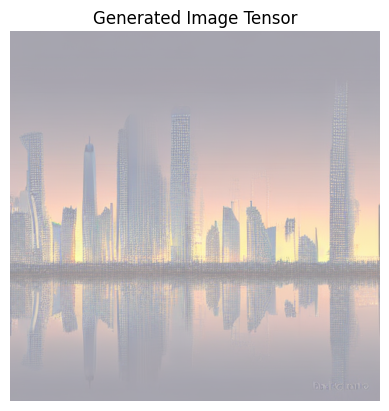

In [11]:
import numpy as np
import matplotlib.pyplot as plt
image_np = image_tensor[0].to("cpu").permute(1, 2, 0).numpy().astype(np.float32)

# Plot using matplotlib
plt.imshow(image_np)
plt.axis("off")
plt.title("Generated Image Tensor")
plt.show()

In [25]:
image_tensor.requires_grad_(True)
image_mean = image_tensor.mean()

In [26]:
image_tensor.requires_grad

True

In [ ]:
image_mean.backward()